# 第一章

In [1]:
import os
import pandas as pd
import requests

PATH = r'./iris'

r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [2]:
with open(PATH + 'iris.data','w') as f:
    f.write(r.text)

In [3]:
df = pd.read_csv(PATH + 'iris.data',names=['sepal length','sepal width','petal length','petal width','class'])

In [4]:
df.head() #默认5行

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


pandas术语中列被称为Series，而表格称为数据框DataFrame

In [6]:
df['sepal length'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length, dtype: float64

In [7]:
df.ix[:3,:2]

/home/mj/.conda/envs/ten/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1


In [8]:
df.ix[:3,[x for x in df.columns if 'width' in x]] #只选择描述width的列

,sepal width,petal width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2


In [9]:
#唯一类
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df[df['class'] == 'Iris-versicolor'].head()

,sepal length,sepal width,petal length,petal width,class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [11]:
df.count()

sepal length    150
sepal width     150
petal length    150
petal width     150
class           150
dtype: int64

In [12]:
df[df['class'] == 'Iris-versicolor'].count()

sepal length    50
sepal width     50
petal length    50
petal width     50
class           50
dtype: int64

In [13]:
#保存到新的数据框并重置索引
virginica = df[df['class'] == 'Iris-versicolor'].reset_index(drop=True)

In [14]:
virginica.head()

,sepal length,sepal width,petal length,petal width,class
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor


In [15]:
df[(df['class'] == 'Iris-virginica') & (df['petal width'] > 2.2)]

,sepal length,sepal width,petal length,petal width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
115,6.4,3.2,5.3,2.3,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica


In [16]:
#快速获取数据
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
#更详细信息
df.describe(percentiles=[.20,.40,.80,.90,.95])

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
20%,5.000000,2.700000,1.500000,0.200000
40%,5.600000,3.000000,3.900000,1.160000
50%,5.800000,3.000000,4.350000,1.300000
80%,6.520000,3.400000,5.320000,1.900000
90%,6.900000,3.610000,5.800000,2.200000
95%,7.255000,3.800000,6.100000,2.300000


In [18]:
#检查特征之间是否存在相关性,显示的是相关系数
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


# Matplotlib库

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

Text(0.5,1.01,'Iris Petal Width')

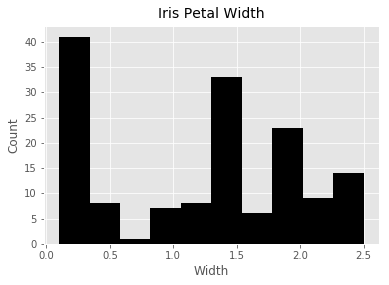

In [20]:
fig,ax = plt.subplots(figsize=(6,4))
ax.hist(df['petal width'],color='black')
ax.set_ylabel('Count',fontsize=12)
ax.set_xlabel('Width',fontsize=12)
plt.title('Iris Petal Width',fontsize=14,y=1.01)

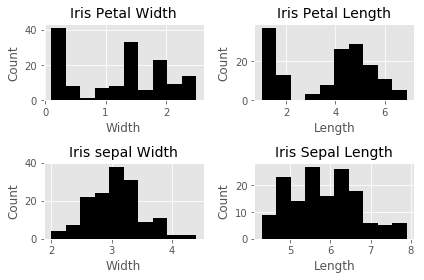

In [21]:
fig,ax = plt.subplots(2,2,figsize=(6,4))
ax[0][0].hist(df['petal width'],color='black')
ax[0][0].set_ylabel('Count',fontsize=12)
ax[0][0].set_xlabel('Width',fontsize=12)
ax[0][0].set_title('Iris Petal Width',fontsize=14,y=1.01)


ax[0][1].hist(df['petal length'],color='black')
ax[0][1].set_ylabel('Count',fontsize=12)
ax[0][1].set_xlabel('Length',fontsize=12)
ax[0][1].set_title('Iris Petal Length',fontsize=14,y=1.01)

ax[1][0].hist(df['sepal width'],color='black')
ax[1][0].set_ylabel('Count',fontsize=12)
ax[1][0].set_xlabel('Width',fontsize=12)
ax[1][0].set_title('Iris sepal Width',fontsize=14,y=1.01)

ax[1][1].hist(df['sepal length'],color='black')
ax[1][1].set_ylabel('Count',fontsize=12)
ax[1][1].set_xlabel('Length',fontsize=12)
ax[1][1].set_title('Iris Sepal Length',fontsize=14,y=1.01)

plt.tight_layout()#调用自动布局，防止过度拥挤

Text(0.5,1,'Petal Scatterplot')

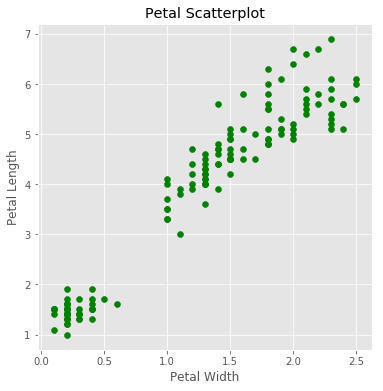

In [22]:
# 绘制花瓣宽度和长度
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(df['petal width'],df['petal length'],color='green')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Scatterplot')

Text(0.5,1,'Petal Length Plot')

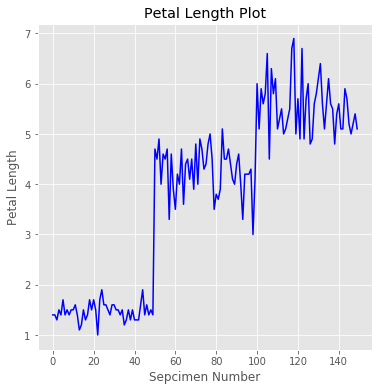

In [23]:
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(df['petal length'],color='blue')
ax.set_xlabel('Sepcimen Number')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Length Plot')

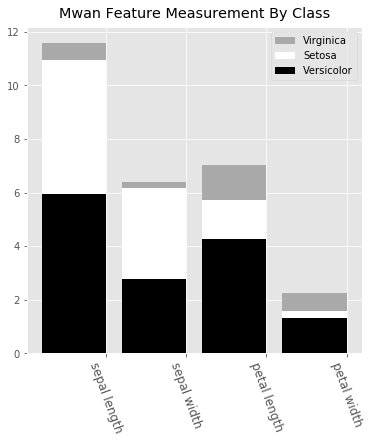

In [24]:
#条形图---最常用
fig,ax = plt.subplots(figsize=(6,6))
bar_width = .8
labels = [x for x in df.columns if 'length' in x or 'width' in x]

ver_y = [df[df['class']=='Iris-versicolor'][x].mean() for x in labels]
vir_y = [df[df['class']=='Iris-virginica'][x].mean() for x in labels]
set_y = [df[df['class']=='Iris-setosa'][x].mean() for x in labels]

x = np.arange(len(labels))

#层级vir_y->set_y->ver_y
ax.bar(x,vir_y,bar_width,bottom=set_y,color='darkgrey')
ax.bar(x,set_y,bar_width,bottom=ver_y,color='white')
ax.bar(x,ver_y,bar_width,color='black')

ax.set_xticks(x + (bar_width/2))
ax.set_xticklabels(labels,rotation=-70,fontsize=12)#斜标签
ax.set_title('Mwan Feature Measurement By Class',y=1.01)
ax.legend(['Virginica','Setosa','Versicolor'])#右上角标签

# Seaborn库

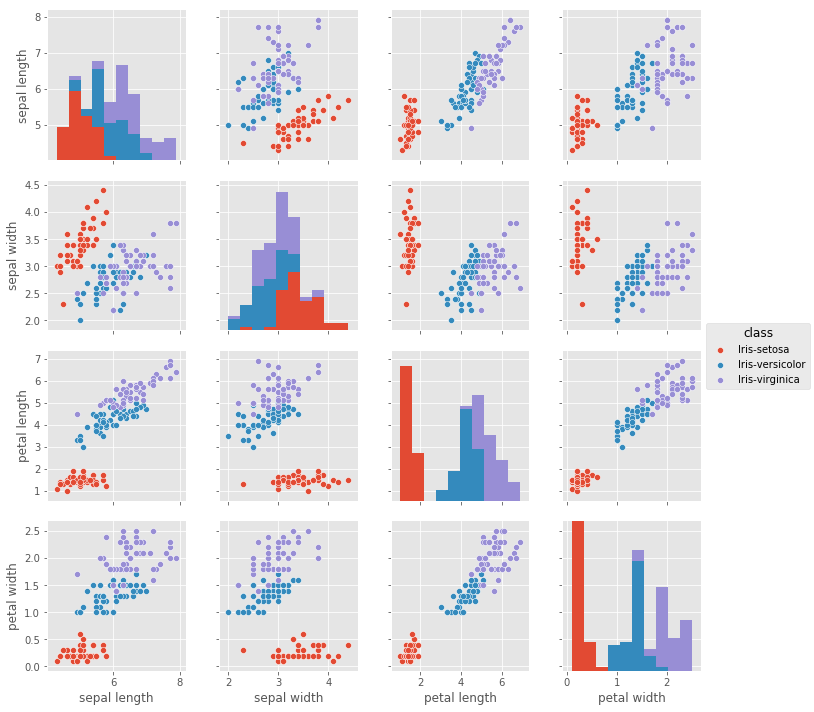

In [25]:
import seaborn as sns
sns.pairplot(df,hue="class")

seaborn建立在matplotlib之上的

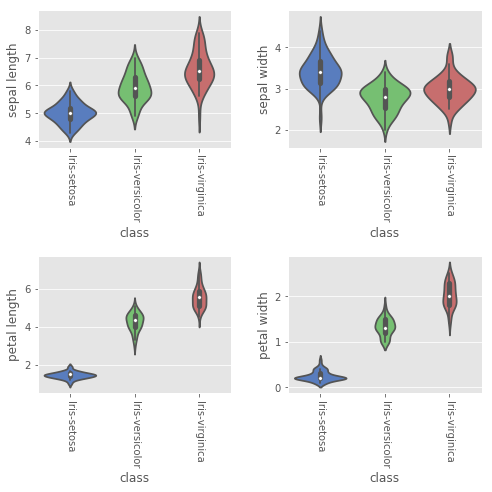

In [26]:
fig,ax = plt.subplots(2,2,figsize=(7,7))
sns.set(style='white',palette='muted')
sns.violinplot(x=df['class'],y=df['sepal length'],ax=ax[0,0])
sns.violinplot(x=df['class'],y=df['sepal width'],ax=ax[0,1])
sns.violinplot(x=df['class'],y=df['petal length'],ax=ax[1,0])
sns.violinplot(x=df['class'],y=df['petal width'],ax=ax[1,1])
for i in ax.flat:
    plt.setp(i.get_xticklabels(),rotation=-90)
fig.tight_layout()

In [27]:
# MAP
df['class'] = df['class'].map({'Iris-setosa':'SET','Iris-vrginica':'VIR','Iris-versicolor':'VER'})
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,SET
1,4.9,3.0,1.4,0.2,SET
2,4.7,3.2,1.3,0.2,SET
3,4.6,3.1,1.5,0.2,SET
4,5.0,3.6,1.4,0.2,SET


In [28]:
#Apply
df['wide petal']=df['petal width'].apply(lambda v:1 if v >=1.3 else 0)
df.head()

,sepal length,sepal width,petal length,petal width,class,wide petal
0,5.1,3.5,1.4,0.2,SET,0
1,4.9,3.0,1.4,0.2,SET,0
2,4.7,3.2,1.3,0.2,SET,0
3,4.6,3.1,1.5,0.2,SET,0
4,5.0,3.6,1.4,0.2,SET,0


In [29]:
df['petal area'] = df.apply(lambda r: r['petal length'] * r['petal width'],axis=1)
df.head()
#注意是整个数据框上调用apply

,sepal length,sepal width,petal length,petal width,class,wide petal,petal area
0,5.1,3.5,1.4,0.2,SET,0,0.28
1,4.9,3.0,1.4,0.2,SET,0,0.28
2,4.7,3.2,1.3,0.2,SET,0,0.26
3,4.6,3.1,1.5,0.2,SET,0,0.30
4,5.0,3.6,1.4,0.2,SET,0,0.28


> ApplyMap对数据框里有的数据执行一个函数

In [30]:
df.applymap(lambda v:np.log(v) if isinstance(v,float) else v)
#检测v是floatd的实例，然后会调用log方法
df.head()#这里显示有问题

,sepal length,sepal width,petal length,petal width,class,wide petal,petal area
0,5.1,3.5,1.4,0.2,SET,0,0.28
1,4.9,3.0,1.4,0.2,SET,0,0.28
2,4.7,3.2,1.3,0.2,SET,0,0.26
3,4.6,3.1,1.5,0.2,SET,0,0.30
4,5.0,3.6,1.4,0.2,SET,0,0.28


> groupby聚合分组

In [31]:
df.groupby('class').mean()

,sepal length,sepal width,petal length,petal width,wide petal,petal area
class,,,,,,
SET,5.006,3.418,1.464,0.244,0.0,0.3628
VER,5.936,2.770,4.260,1.326,0.7,5.7204


In [32]:
df.groupby('class').describe()

petal area                                                    \
           count    mean       std   min    25%    50%   75%   max   
class                                                                
SET         50.0  0.3628  0.183248  0.11  0.265  0.300  0.42  0.96   
VER         50.0  5.7204  1.368403  3.30  4.860  5.615  6.75  8.64   

      petal length        ...  sepal width      wide petal                     \
             count   mean ...          75%  max      count mean      std  min   
class                     ...                                                   
SET           50.0  1.464 ...        3.675  4.4       50.0  0.0  0.00000  0.0   
VER           50.0  4.260 ...        3.000  3.4       50.0  0.7  0.46291  0.0   

                           
       25%  50%  75%  max  
class                      
SET    0.0  0.0  0.0  0.0  
VER    0.0  1.0  1.0  1.0  

[2 rows x 48 columns]

In [33]:
df.groupby('petal width')['class'].unique().to_frame()

,class
petal width,
0.1,[SET]
0.2,[SET]
0.3,[SET]
0.4,[SET]
0.5,[SET]
0.6,[SET]
1.0,[VER]
1.1,[VER]
1.2,[VER]


## 自定义聚集函数

In [34]:
df.groupby('class')['petal width'].agg({'delta':lambda x : x.max() - x.min(),'max':np.max,'min':np.min})

/home/mj/.conda/envs/ten/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,delta,max,min
class,,,
SET,0.5,0.6,0.1
VER,0.8,1.8,1.0


# 建模和评估
## 1.评估库Statsmodels

Text(0.5,1.02,'Setosa Septal Witdh vs. Sepal Length')

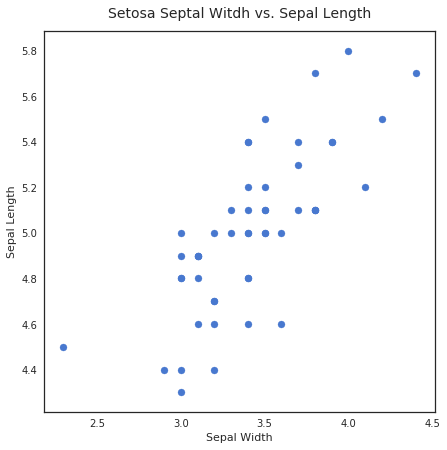

In [35]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df['sepal width'][:50],df['sepal length'][:50])
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Septal Witdh vs. Sepal Length',fontsize=14,y=1.02)

In [36]:
##使用statsmodels
import statsmodels.api as sm

/home/mj/.conda/envs/ten/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [37]:
y = df['sepal length'][:50]
x = df['sepal width'][:50]
X = sm.add_constant(x)

result = sm.OLS(y,X).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Thu, 22 Feb 2018   Prob (F-statistic):           4.75e-10
Time:                        21:50:37   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

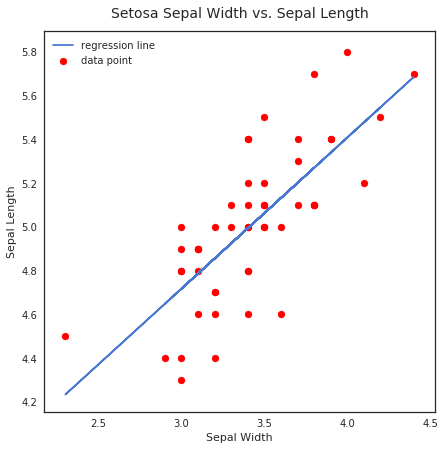

In [40]:
# 绘制回归曲线
fig,ax = plt.subplots(figsize = (7,7))
ax.plot(x,result.fittedvalues,label='regression line')
ax.scatter(x,y,label='data point',color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length',fontsize=14,y=1.02)
ax.legend(loc=2)

## scikit-learn打造学习模型

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import numpy as np

In [8]:
clf = RandomForestClassifier(max_depth=5,n_estimators=10)

X = df.ix[:,:4]
y = df.ix[:,4]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred,y_test)),columns=['predicted','actual'])

rf['correct'] = rf.apply(lambda r:1 if r['predicted'] == r['actual'] else 0,axis=1)#真实值和预测值相同显示1

rf.head()


,predicted,actual,correct
0,Iris-setosa,Iris-setosa,1
1,Iris-setosa,Iris-setosa,1
2,Iris-virginica,Iris-virginica,1
3,Iris-versicolor,Iris-versicolor,1
4,Iris-setosa,Iris-setosa,1


In [9]:
rf['correct'].sum()/rf['correct'].count()

0.9333333333333333

看看哪些特征提供最佳的辨别力或者说预测能力

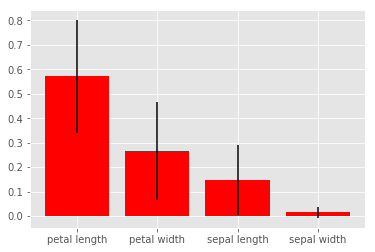

In [23]:
f_importances = clf.feature_importances_
f_names= df.columns[:4]
f_std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)

zz = zip(f_importances,f_names,f_std)
zzs = sorted(zz,key=lambda x:x[0], reverse=True)
imps = [x[0] for x in zzs]
lables = [x[1] for x in zzs]
errs = [x[2] for x in zzs]
plt.bar(range(len(f_importances)),imps,color = "r",yerr = errs,align="center")
plt.xticks(range(len(f_importances)),lables);

In [24]:
## 使用支持向量机（SVM）
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split


In [31]:
clf = OneVsRestClassifier(SVC(kernel='linear'))

X = df.ix[:,:4]
y = np.array(df.ix[:,4]).astype(str)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred,y_test)),columns=['predicted','actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
rf.head()

,predicted,actual,correct
0,Iris-setosa,Iris-setosa,1
1,Iris-versicolor,Iris-versicolor,1
2,Iris-versicolor,Iris-virginica,0
3,Iris-versicolor,Iris-versicolor,1
4,Iris-versicolor,Iris-versicolor,1


In [32]:
rf['correct'].sum()/rf['correct'].count()

0.9777777777777777